<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [1]:
#librerias
from sklearn.datasets import fetch_lfw_people
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#cargar datos
lfw_dataset = fetch_lfw_people(min_faces_per_person=25, resize=0.4, data_home='data')

(Utilice este espacio para describir su procedimiento)

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [5]:
# Obtener las dimensiones del conjunto de imágenes
n_muestras, h, w = lfw_dataset.images.shape

# Imprimir la descripción del conjunto de datos
print(lfw_dataset.DESCR)

# Imprimir las dimensiones
print(f"Número de muestras (imágenes): {n_muestras}")
print(f"Número de características (dimensionalidad): {h * w}")
print(f"Dimensiones de cada imagen: {h} x {w} píxeles")
print(f"Número de personas (clases): {len(lfw_dataset.target_names)}")

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, and the details are available on the Kaggle website:

https://www.kaggle.com/datasets/jessicali9530/lfw-dataset

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
i

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

--- Distribución de imágenes por individuo ---
                Individuo  Número de Imágenes
            George W Bush                 530
             Colin Powell                 236
               Tony Blair                 144
          Donald Rumsfeld                 121
        Gerhard Schroeder                 109
             Ariel Sharon                  77
              Hugo Chavez                  71
        Junichiro Koizumi                  60
            Jean Chretien                  55
            John Ashcroft                  53
          Serena Williams                  52
           Jacques Chirac                  52
           Vladimir Putin                  49
Luiz Inacio Lula da Silva                  48
  Gloria Macapagal Arroyo                  44
    Arnold Schwarzenegger                  42
        Jennifer Capriati                  42
               Laura Bush                  41
           Lleyton Hewitt                  41
         Alejandro Toledo        

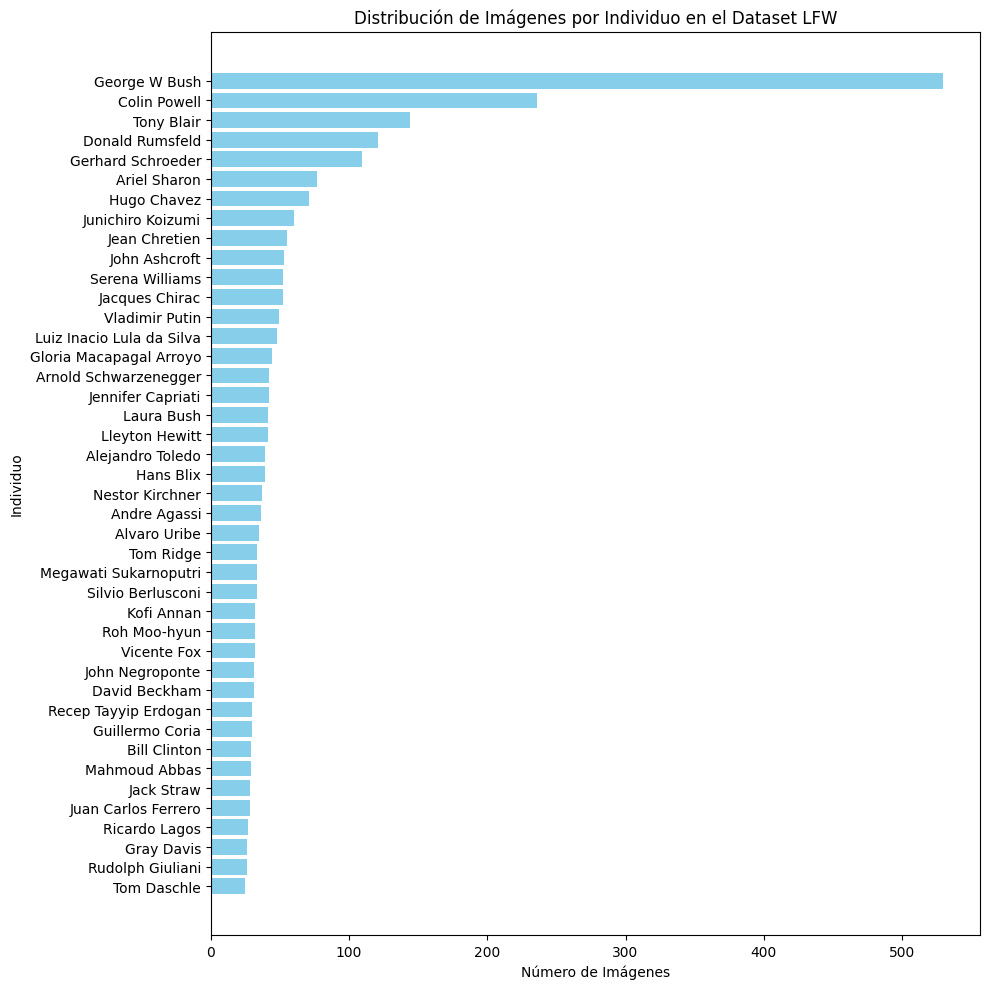

In [6]:
print("--- Distribución de imágenes por individuo ---")
# Contar las ocurrencias de cada persona usando NumPy
unique_targets, counts = np.unique(lfw_dataset.target, return_counts=True)

# Crear un DataFrame de pandas para mostrar los resultados de forma ordenada
distribution_df = pd.DataFrame({
    'Individuo': lfw_dataset.target_names[unique_targets],
    'Número de Imágenes': counts
}).sort_values(by='Número de Imágenes', ascending=False)

# Imprimir la tabla
print(distribution_df.to_string(index=False))

# Crear un gráfico de barras para visualizar la distribución
plt.figure(figsize=(10, 10))
plt.barh(distribution_df['Individuo'], distribution_df['Número de Imágenes'], color='skyblue')
plt.xlabel('Número de Imágenes')
plt.ylabel('Individuo')
plt.title('Distribución de Imágenes por Individuo en el Dataset LFW')
plt.gca().invert_yaxis()  # Mostrar a la persona con más imágenes en la parte superior
plt.tight_layout()
plt.savefig('distribucion_imagenes.png')
print("\nGráfico de la distribución guardado como 'distribucion_imagenes.png'")

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 


--- Análisis de imágenes de Serena Williams ---
Número total de imágenes de Serena Williams: 52
Gráfico con los rostros de Serena Williams guardado como 'serena_williams_faces.png'


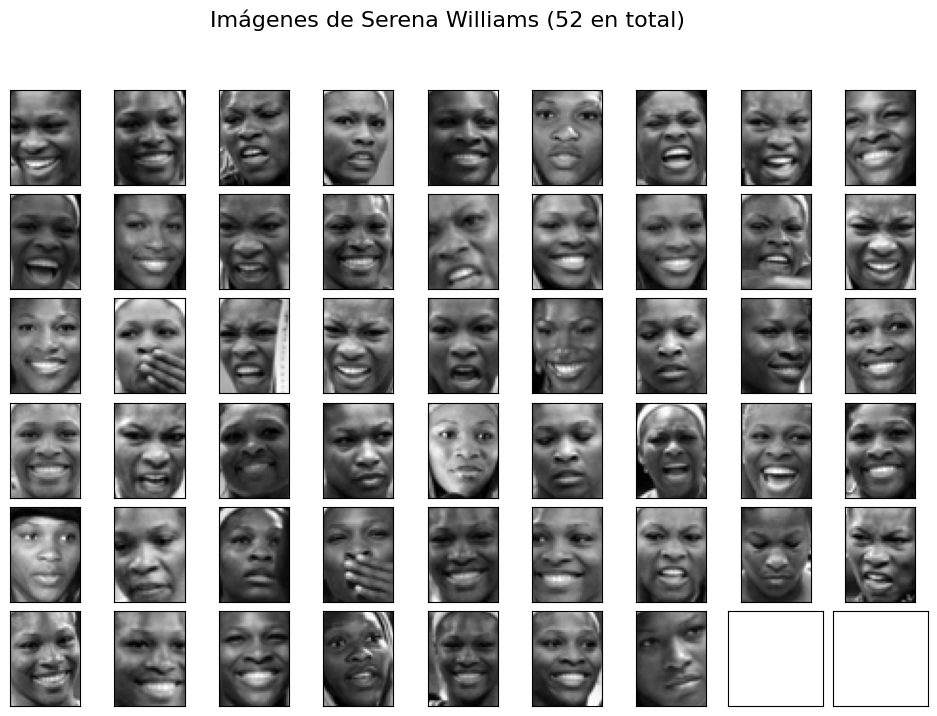

In [7]:
print("\n--- Análisis de imágenes de Serena Williams ---")
try:
    # Encontrar el índice que corresponde a 'Serena Williams'
    serena_williams_id = np.where(lfw_dataset.target_names == 'Serena Williams')[0][0]

    # Contar cuántas imágenes tienen esa etiqueta
    num_serena_images = np.sum(lfw_dataset.target == serena_williams_id)
    print(f"Número total de imágenes de Serena Williams: {num_serena_images}")

    # Obtener los índices de todas las imágenes de Serena Williams
    serena_indices = np.where(lfw_dataset.target == serena_williams_id)[0]

    # Graficar las imágenes en una cuadrícula
    # Se ajusta el tamaño de la figura y la cuadrícula según la cantidad de imágenes
    fig, axes = plt.subplots(6, 9, figsize=(12, 8),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    fig.suptitle(f"Imágenes de Serena Williams ({num_serena_images} en total)", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(serena_indices):
            ax.imshow(lfw_dataset.images[serena_indices[i]], cmap='gray')

    plt.savefig('serena_williams_faces.png')
    print("Gráfico con los rostros de Serena Williams guardado como 'serena_williams_faces.png'")

except IndexError:
    print("\nNo se encontraron imágenes de 'Serena Williams' en el conjunto de datos con el filtro aplicado.")
    print("Nombres disponibles:", lfw_dataset.target_names)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

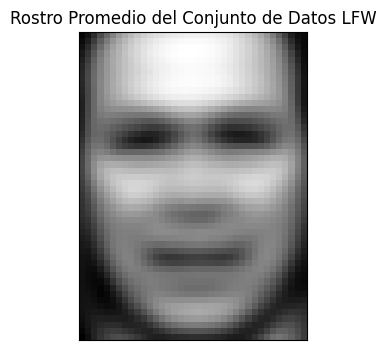

In [8]:
# Calcular el rostro promedio
# lfw_dataset.data es la matriz donde cada fila es una imagen aplanada.
# .mean(axis=0) calcula el promedio de cada columna (cada píxel).
rostro_promedio = lfw_dataset.data.mean(axis=0)

# Graficar el rostro promedio
# Primero, redimensionamos el vector promedio a las dimensiones originales de la imagen (h, w)
plt.figure(figsize=(4, 4))
plt.imshow(rostro_promedio.reshape(h, w), cmap=plt.cm.gray)
plt.title("Rostro Promedio del Conjunto de Datos LFW")
plt.xticks(())
plt.yticks(())
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

--- Imágenes de Serena Williams (sin el rostro promedio) ---


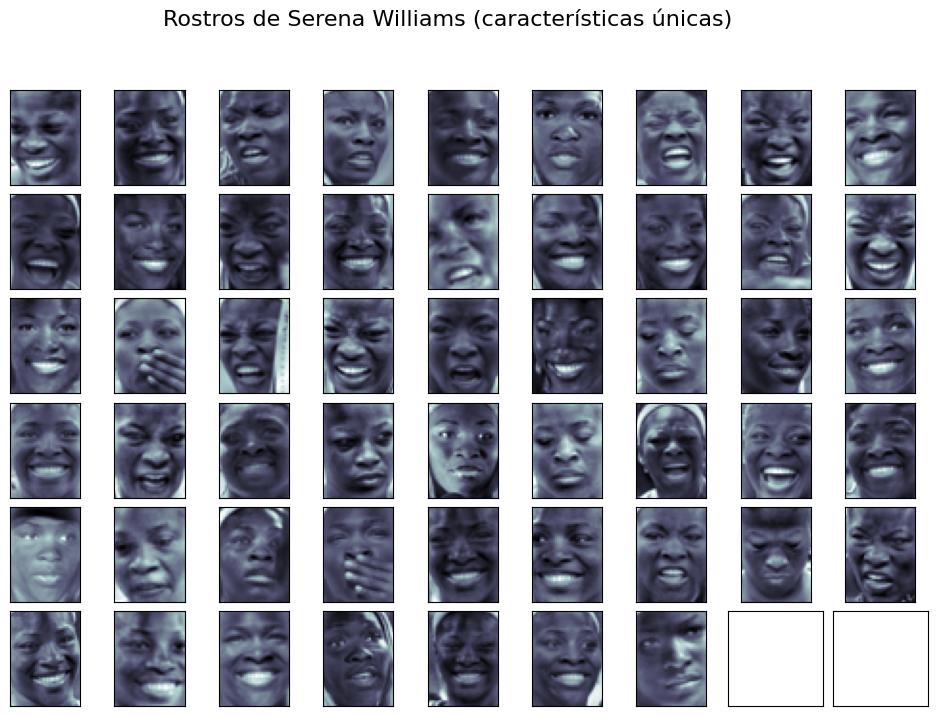

In [9]:
# --- 3.2. Reste el rostro promedio ---

# Restamos el rostro promedio a cada una de las imágenes.
# lfw_dataset.data es una matriz de (n_muestras, n_características).
# rostro_promedio es un vector de (n_características,).
# NumPy/Pandas resta automáticamente el vector promedio a cada fila de la matriz.
X_demeaned = lfw_dataset.data - rostro_promedio

# Graficar las imágenes de Serena Williams sin el rostro promedio
print("--- Imágenes de Serena Williams (sin el rostro promedio) ---")

try:
    # (Estos índices se calcularon en el paso anterior)
    serena_williams_id = np.where(lfw_dataset.target_names == 'Serena Williams')[0][0]
    serena_indices = np.where(lfw_dataset.target == serena_williams_id)[0]
    num_serena_images = len(serena_indices)

    fig, axes = plt.subplots(6, 9, figsize=(12, 8),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))

    fig.suptitle(f"Rostros de Serena Williams (características únicas)", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < num_serena_images:
            # Usamos los datos de X_demeaned para graficar
            ax.imshow(X_demeaned[serena_indices[i]].reshape(h, w), cmap=plt.cm.bone) # Usamos un mapa de color diferente para resaltar

    plt.show()

except IndexError:
    print("\nNo se encontraron imágenes de 'Serena Williams' para graficar.")

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

Aplicando SVD a la matriz de rostros centrados...
Forma de U: (2588, 1850)
Número de valores singulares (S): 1850
Forma de Vt: (1850, 1850)

La proporción de la varianza representada por los primeros 1000 valores singulares es: 0.9990
Esto corresponde al 99.90% de la información total.


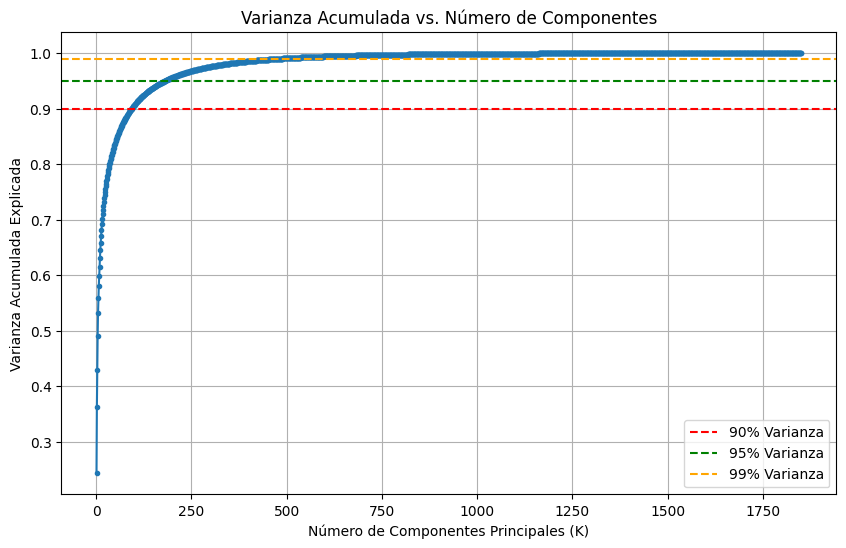

In [10]:
from scipy.linalg import svd
print("Aplicando SVD a la matriz de rostros centrados...")
# Aplicamos SVD a la matriz de datos sin el rostro promedio
# full_matrices=False es una optimización para no calcular las matrices U y Vt completas
U, s, Vt = svd(X_demeaned, full_matrices=False)

print(f"Forma de U: {U.shape}")
print(f"Número de valores singulares (S): {s.shape[0]}")
print(f"Forma de Vt: {Vt.shape}")

# --- Calcular la proporción de la varianza ---

# La varianza explicada por cada componente es el cuadrado del valor singular dividido por la suma total de los cuadrados.
varianza_explicada = (s**2) / np.sum(s**2)

# Calculamos la proporción de la varianza para K=1000
K = 1000
varianza_con_K_componentes = np.sum(varianza_explicada[:K])

print(f"\nLa proporción de la varianza representada por los primeros {K} valores singulares es: {varianza_con_K_componentes:.4f}")
print(f"Esto corresponde al {varianza_con_K_componentes:.2%} de la información total.")

# --- Graficar la varianza acumulada para justificar la elección de K ---
# Este gráfico es clave para entender cuántos componentes son realmente necesarios.
varianza_acumulada = np.cumsum(varianza_explicada)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='.', linestyle='-')
plt.grid(True)
plt.xlabel('Número de Componentes Principales (K)')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada vs. Número de Componentes')
# Líneas de referencia para ver cuántos componentes se necesitan para ciertos umbrales
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Varianza')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Varianza')
plt.axhline(y=0.99, color='orange', linestyle='--', label='99% Varianza')
plt.legend()
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

Comparando imágenes originales vs. reconstruidas para Serena Williams (usando K=150)


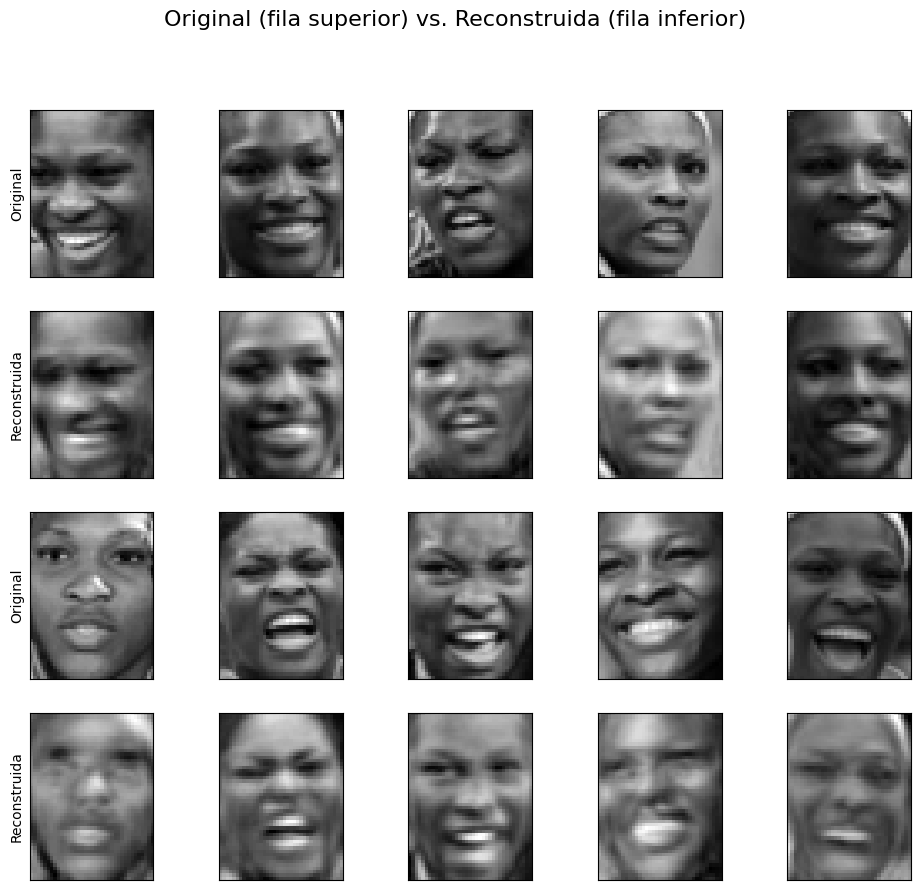

In [11]:
# --- 3.4. Reconstrucción de imágenes ---

# Elegimos K=150 componentes, que capturan más del 90% de la varianza
K = 150

# Reconstruimos la matriz de datos centrados usando solo los primeros K componentes
# Fórmula: X_reconstruido ≈ U_k * S_k * Vt_k
X_reconstruido_demeaned = np.dot(U[:, :K], np.dot(np.diag(s[:K]), Vt[:K, :]))

# ¡Paso clave! Añadimos de nuevo el rostro promedio para obtener las imágenes finales
X_reconstruido = X_reconstruido_demeaned + rostro_promedio

# --- Comparación de imágenes originales y reconstruidas para Serena Williams ---
print("Comparando imágenes originales vs. reconstruidas para Serena Williams (usando K=150)")

try:
    # Obtenemos los índices de las imágenes de Serena Williams
    serena_williams_id = np.where(lfw_dataset.target_names == 'Serena Williams')[0][0]
    serena_indices = np.where(lfw_dataset.target == serena_williams_id)[0]
    
    # Seleccionamos las imágenes originales y reconstruidas de Serena
    imagenes_originales = lfw_dataset.data[serena_indices]
    imagenes_reconstruidas = X_reconstruido[serena_indices]
    
    # Graficamos pares de imágenes (Original vs. Reconstruida)
    fig, axes = plt.subplots(4, 5, figsize=(12, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.2, wspace=0.1))
    
    fig.suptitle("Original (fila superior) vs. Reconstruida (fila inferior)", fontsize=16)

    for i in range(10): # Mostramos las primeras 10 para una comparación clara
        # Fila para imágenes originales
        ax_orig = axes[2 * (i // 5), i % 5]
        ax_orig.imshow(imagenes_originales[i].reshape(h, w), cmap=plt.cm.gray)
        if i % 5 == 0:
            ax_orig.set_ylabel("Original")
            
        # Fila para imágenes reconstruidas
        ax_recon = axes[2 * (i // 5) + 1, i % 5]
        ax_recon.imshow(imagenes_reconstruidas[i].reshape(h, w), cmap=plt.cm.gray)
        if i % 5 == 0:
            ax_recon.set_ylabel("Reconstruida")
            
    plt.show()

except IndexError:
    print("\nNo se encontraron imágenes de 'Serena Williams' para comparar.")

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [18]:
# --- 4.1. Identificando a George W Bush ---

# Encontrar el índice numérico que corresponde a 'George W Bush'
# np.where nos devuelve los índices donde el nombre coincide
id_bush = np.where(lfw_dataset.target_names == 'George W Bush')[0][0]

# Crear la variable binaria 'y'
# Comparamos cada etiqueta en lfw_dataset.target con el id_bush
# Esto crea un arreglo booleano (True/False).
# .astype(np.int8) convierte True a 1 y False a 0.
y = (lfw_dataset.target == id_bush).astype(np.int8)

# Verifiquemos el resultado
print("Variable objetivo 'y' creada.")
print(f"Número de imágenes de George W Bush (etiqueta 1): {np.sum(y == 1)}")
print(f"Número de imágenes de otras personas (etiqueta 0): {np.sum(y == 0)}")
print("\nPrimeras 10 etiquetas de 'y':")
print(y[:10])

Variable objetivo 'y' creada.
Número de imágenes de George W Bush (etiqueta 1): 530
Número de imágenes de otras personas (etiqueta 0): 2058

Primeras 10 etiquetas de 'y':
[0 1 0 0 1 0 0 0 0 0]


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [19]:
# Importar la función necesaria
from sklearn.model_selection import train_test_split

# --- 4.2. Bases de Entrenamiento y Prueba ---

# Definimos nuestras características 'X'.
# En lugar de usar los 1850 píxeles, usaremos las coordenadas de cada imagen
# en el nuevo espacio de las eigenfaces. Esta es la matriz U * s.
# Usaremos los K=150 componentes que capturan la mayor parte de la varianza.
K = 150
X = np.dot(U[:, :K], np.diag(s[:K])) # O más eficientemente: U[:, :K] * s[:K]

# Dividir los datos
# X: nuestras nuevas características (las 150 eigen-coordenadas)
# y: la variable binaria (1 si es Bush, 0 si no)
# test_size=0.2: 20% de los datos para el conjunto de prueba.
# random_state=10101: asegura que la división sea siempre la misma, para reproducibilidad.
# stratify=y: ¡Muy importante! Asegura que la proporción de imágenes de Bush (y no Bush)
#              sea la misma en el conjunto de entrenamiento y en el de prueba.
#              Esto es crucial debido al desbalance de clases.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10101, stratify=y
)

# Verificamos las dimensiones de los conjuntos resultantes
print("División de datos completada.")
print(f"Forma de X_train (características de entrenamiento): {X_train.shape}")
print(f"Forma de y_train (etiquetas de entrenamiento): {y_train.shape}")
print(f"Forma de X_test (características de prueba): {X_test.shape}")
print(f"Forma de y_test (etiquetas de prueba): {y_test.shape}")

# Verifiquemos la estratificación
print(f"\nProporción de Bush en y_train: {np.mean(y_train):.2%}")
print(f"Proporción de Bush en y_test:  {np.mean(y_test):.2%}")

División de datos completada.
Forma de X_train (características de entrenamiento): (2070, 150)
Forma de y_train (etiquetas de entrenamiento): (2070,)
Forma de X_test (características de prueba): (518, 150)
Forma de y_test (etiquetas de prueba): (518,)

Proporción de Bush en y_train: 20.48%
Proporción de Bush en y_test:  20.46%


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [20]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
from scipy.linalg import svd

# --- PASO 1: Dividir los datos originales (píxeles) ---
# Usamos lfw_dataset.data, que tiene los 1850 píxeles por imagen
X_orig = lfw_dataset.data
y = (lfw_dataset.target == np.where(lfw_dataset.target_names == 'George W Bush')[0][0]).astype(np.int8)

X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_orig, y, test_size=0.20, random_state=10101, stratify=y
)

# --- PASO 2 (4.3): Aprender la SVD SOLO del conjunto de entrenamiento ---
print("--- Paso 4.3: Realizando SVD sobre los datos de entrenamiento ---")
# 2.1. Calcular el rostro promedio SOLO del set de entrenamiento
mean_train = X_train_orig.mean(axis=0)

# 2.2. Centrar el set de entrenamiento
X_train_centered = X_train_orig - mean_train

# 2.3. Realizar SVD sobre el set de entrenamiento centrado
U_train, s_train, Vt_train = svd(X_train_centered, full_matrices=False)
print("SVD completada. Las eigenfaces (base) han sido aprendidas de los datos de entrenamiento.")

--- Paso 4.3: Realizando SVD sobre los datos de entrenamiento ---
SVD completada. Las eigenfaces (base) han sido aprendidas de los datos de entrenamiento.


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [21]:
from sklearn.linear_model import LogisticRegression

#Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)

# --- PASO 3 (4.4): Construir Componentes Principales y Entrenar Modelo ---
print("\n--- Paso 4.4: Construyendo PCs y entrenando el modelo logístico ---")
K = 1000 # El taller especifica usar 1000 componentes

# 3.1. Construir los K componentes principales para el set de entrenamiento
# Proyectamos los datos centrados sobre la nueva base (Vt_train)
X_train_pca = X_train_centered @ Vt_train.T[:, :K]

# 3.2. Construir los K componentes principales para el set de prueba
# ¡Importante! Usamos la media y la base aprendidas del set de entrenamiento
X_test_centered = X_test_orig - mean_train
X_test_pca = X_test_centered @ Vt_train.T[:, :K]

print(f"Forma de las características de entrenamiento (X_train_pca): {X_train_pca.shape}")
print(f"Forma de las características de prueba (X_test_pca): {X_test_pca.shape}")

# 3.3. Entrenar el modelo logístico
Modelo_Logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)
print("\nEntrenando el modelo...")
Modelo_Logistico.fit(X_train_pca, y_train)
print("Entrenamiento completado.")

# 3.4. Evaluar el modelo
print("\n--- Evaluación del Modelo en el Conjunto de Prueba ---")
y_pred = Modelo_Logistico.predict(X_test_pca)

# La métrica pedida es "porcentaje de imágenes de George W Bush clasificadas correctamente"
# Esto es el RECALL de la clase 1 (Bush).
report = classification_report(y_test, y_pred, target_names=['No Bush', 'George W Bush'])
print(report)

# También mostramos la matriz de confusión para un análisis más detallado
print("Matriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Verdadero No Bush', 'Verdadero Bush'], columns=['Predicho No Bush', 'Predicho Bush'])
print(cm_df)

# Extraer y mostrar la métrica exacta solicitada
recall_bush = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(f"\nPorcentaje de imágenes de George W Bush clasificadas correctamente (Recall): {recall_bush:.2%}")


--- Paso 4.4: Construyendo PCs y entrenando el modelo logístico ---
Forma de las características de entrenamiento (X_train_pca): (2070, 1000)
Forma de las características de prueba (X_test_pca): (518, 1000)

Entrenando el modelo...
Entrenamiento completado.

--- Evaluación del Modelo en el Conjunto de Prueba ---
               precision    recall  f1-score   support

      No Bush       0.94      0.95      0.95       412
George W Bush       0.81      0.78      0.80       106

     accuracy                           0.92       518
    macro avg       0.88      0.87      0.87       518
 weighted avg       0.92      0.92      0.92       518

Matriz de Confusión:
                   Predicho No Bush  Predicho Bush
Verdadero No Bush               393             19
Verdadero Bush                   23             83

Porcentaje de imágenes de George W Bush clasificadas correctamente (Recall): 78.30%


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [22]:
# Importar las herramientas necesarias
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# --- 4.5. Encontrando el número óptimo de componentes (K) ---

# 1. Definir el Pipeline
# Un pipeline encadena los pasos: primero PCA para reducir la dimensión,
# y luego el clasificador logístico.
pipe = Pipeline([
    ('pca', PCA()),
    ('logistic', LogisticRegression(solver='sag', random_state=10101, max_iter=1000))
])

# 2. Definir la grilla de parámetros a buscar
# Probaremos diferentes valores para el número de componentes en PCA.
param_grid = {
    'pca__n_components': [50, 100, 150, 200, 250, 300]
}

# 3. Configurar y ejecutar la Búsqueda con Validación Cruzada (GridSearchCV)
# estimator=pipe: el pipeline que queremos optimizar.
# param_grid: los valores de K que queremos probar.
# cv=5: validación cruzada con 5 folds.
# scoring='recall': la métrica que queremos maximizar (recall de la clase positiva).
# n_jobs=-1: usa todos los procesadores disponibles para acelerar el cálculo.
print("--- Iniciando la búsqueda del K óptimo con Validación Cruzada (esto puede tardar) ---")
search = GridSearchCV(pipe, param_grid, cv=5, scoring='recall', n_jobs=-1)

# Ejecutamos la búsqueda sobre los datos de entrenamiento originales
search.fit(X_train_orig, y_train)

print("\nBúsqueda completada.")
print(f"El número óptimo de componentes principales (K) es: {search.best_params_['pca__n_components']}")
print(f"El mejor score de recall promedio en validación cruzada fue: {search.best_score_:.2%}")

# 4. Evaluar el mejor modelo encontrado en el conjunto de prueba
print("\n--- Evaluación del Modelo Óptimo en el Conjunto de Prueba ---")
y_pred_best = search.predict(X_test_orig)

report_best = classification_report(y_test, y_pred_best, target_names=['No Bush', 'George W Bush'])
print(report_best)

print("Matriz de Confusión del Modelo Óptimo:")
cm_best = confusion_matrix(y_test, y_pred_best)
cm_best_df = pd.DataFrame(cm_best, index=['Verdadero No Bush', 'Verdadero Bush'], columns=['Predicho No Bush', 'Predicho Bush'])
print(cm_best_df)

recall_bush_best = cm_best[1, 1] / (cm_best[1, 0] + cm_best[1, 1])
print(f"\nPorcentaje de imágenes de George W Bush clasificadas correctamente (Recall): {recall_bush_best:.2%}")

--- Iniciando la búsqueda del K óptimo con Validación Cruzada (esto puede tardar) ---

Búsqueda completada.
El número óptimo de componentes principales (K) es: 300
El mejor score de recall promedio en validación cruzada fue: 73.34%

--- Evaluación del Modelo Óptimo en el Conjunto de Prueba ---
               precision    recall  f1-score   support

      No Bush       0.94      0.96      0.95       412
George W Bush       0.81      0.75      0.78       106

     accuracy                           0.91       518
    macro avg       0.88      0.85      0.86       518
 weighted avg       0.91      0.91      0.91       518

Matriz de Confusión del Modelo Óptimo:
                   Predicho No Bush  Predicho Bush
Verdadero No Bush               394             18
Verdadero Bush                   27             79

Porcentaje de imágenes de George W Bush clasificadas correctamente (Recall): 74.53%


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).